### Make Figures 7 and 8
Examine how robust the iterative algorithm and direct baselines are to violations of the assumption that there are two agent groups. Before running this notebook, produce the summary metric csvs by running python3 run_robustness_semisynth_experiment.py model_type num_groups subset with the product of these arguments:
- model_type: Iterative, Direct
- num_groups: 2, 3, 5, 10
- subset: drug_possession, misdemeanor_under35

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from itertools import product

In [2]:
num_groups = [2, 3, 5, 10]
secondary_classes = ['LogisticRegression', 'DecisionTree', 'RandomForest']
secondary_classes_human_readable = {'LogisticRegression': 'Ridge regression', 'DecisionTree': 'Decision tree', \
                                    'RandomForest': 'Random forest'}

In [3]:
def load_data(subset_name, model_name):
    assert subset_name in {'drug_possession', 'misdemeanor_under35'}
    all_df = None
    for n_groups in num_groups:
        this_df = pd.read_csv('semisynth_robust_' + subset_name + '_numgroups' + str(n_groups) 
                              + '/' + model_name + '_summary_metrics.csv')
        this_df['Num groups'] = n_groups
        if all_df is None:
            all_df = this_df
        else:
            all_df = pd.concat((all_df, this_df), ignore_index=True)
    all_df.rename(columns={'Model class': 'Region model'}, inplace=True)
    return all_df

In [4]:
drug_possession_df = load_data('drug_possession', 'Iterative')

In [5]:
drug_possession_paired_df = load_data('drug_possession', 'Pair')

In [6]:
misdemeanor_under35_df = load_data('misdemeanor_under35', 'Iterative')

In [7]:
misdemeanor_under35_paired_df = load_data('misdemeanor_under35', 'Pair')

In [8]:
drug_possession_df['Model'] = 'Iterative'
drug_possession_paired_df['Model'] = 'Direct'
drug_possession_all_df = pd.concat((drug_possession_df, drug_possession_paired_df), ignore_index=True)
drug_possession_all_df['Region model'] = drug_possession_all_df['Region model'].map(secondary_classes_human_readable)

In [10]:
misdemeanor_under35_df['Model'] = 'Iterative'
misdemeanor_under35_paired_df['Model'] = 'Direct'
misdemeanor_under35_all_df = pd.concat((misdemeanor_under35_df, misdemeanor_under35_paired_df), ignore_index=True)
misdemeanor_under35_all_df['Region model'] = misdemeanor_under35_all_df['Region model'].map(secondary_classes_human_readable)

In [14]:
def plot_all_metric(all_df, subset_name):
    assert subset_name in {'drug_possession', 'misdemeanor_under35'}
    metric_names = ['Region AUC', 'Region precision', 'Region recall']
    fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(18,12), sharey=True, sharex=True)
    plt.rcParams.update({'font.size':16})
    region_models = ['Ridge regression', 'Decision tree', 'Random forest']
    for row_idx, col_idx in product(range(len(metric_names)), range(len(region_models))):
        sns.lineplot(data=all_df.loc[all_df['Region model']==region_models[col_idx]],
                     x='Num groups',
                     y=metric_names[row_idx],
                     hue='Model',
                     style='Model',
                     ax=ax[row_idx, col_idx],
                     dashes=True,
                     palette='colorblind',
                     err_style="bars",
                     alpha=0.75,
                     linewidth=3,
                     seed=0)
        if row_idx != len(region_models) - 1 or col_idx != len(metric_names) - 1:
            ax[row_idx, col_idx].get_legend().remove()
        if row_idx == 0:
            ax[row_idx, col_idx].set_title(region_models[col_idx] + ' region')
    plt.tight_layout()
    plt.savefig(subset_name + '_semisynth_robustness_all.pdf')
    plt.show()

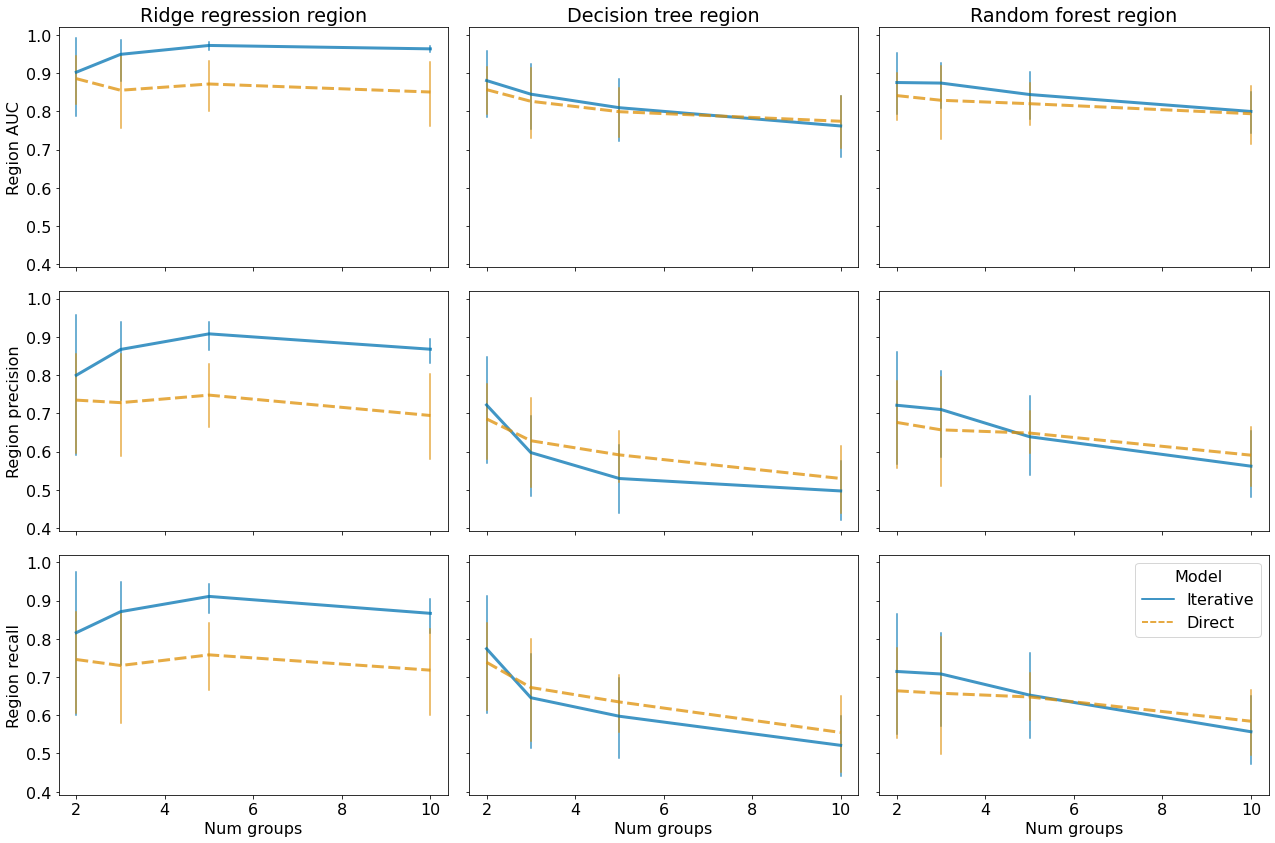

In [15]:
plot_all_metric(drug_possession_all_df, 'drug_possession')

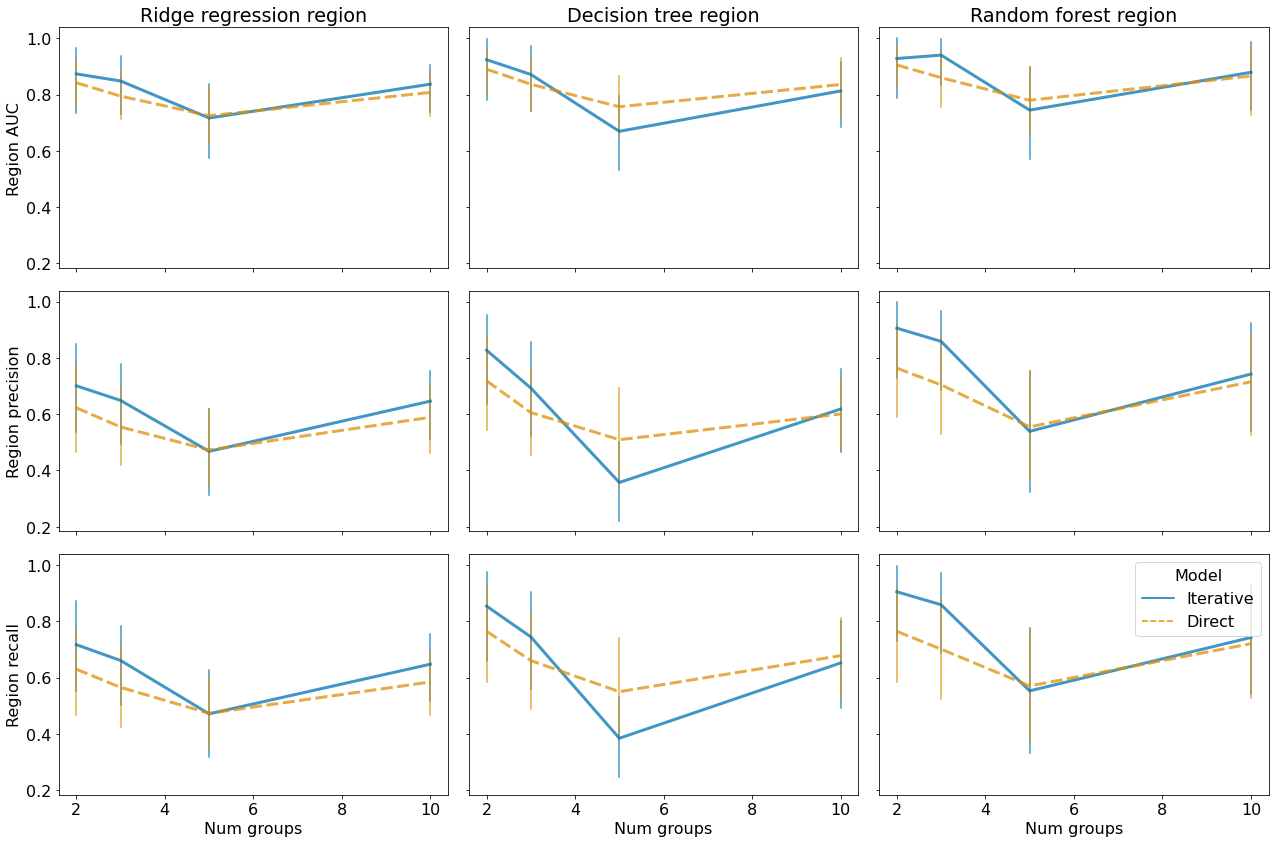

In [16]:
plot_all_metric(misdemeanor_under35_all_df, 'misdemeanor_under35')